# Time Series Prediction using Stanfords's NeuralProphet
## Based on Facebook's Prophet

In [2]:
from neuralprophet import NeuralProphet
# Import necessary packages
import pandas as pd
import numpy as np
#use widget instead of inline to make the plot interactive
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/energydata_complete.csv', parse_dates=['date'])
df = df.set_index(['date'],drop=False)

In [4]:
df_temp = df[['T_out']]

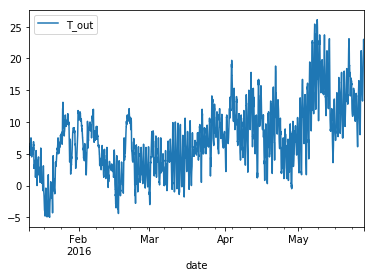

In [5]:
df_temp.plot()

In [6]:
df_temp['ds'] = df_temp.index
df_temp['y'] = df_temp.T_out
df_temp.drop('T_out',axis=1,inplace=True)

WARNING - (py.warnings._showwarnmsg) - c:\users\manoj\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.

WARNING - (py.warnings._showwarnmsg) - c:\users\manoj\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

WARNING - (py.warnings._showwarnmsg) - c:\users\manoj\envs\datascience\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 


In [7]:
df_temp.head()

,ds,y
date,,
2016-01-11 17:00:00,2016-01-11 17:00:00,6.600000
2016-01-11 17:10:00,2016-01-11 17:10:00,6.483333
2016-01-11 17:20:00,2016-01-11 17:20:00,6.366667
2016-01-11 17:30:00,2016-01-11 17:30:00,6.250000
2016-01-11 17:40:00,2016-01-11 17:40:00,6.133333


In [8]:
m = NeuralProphet(
    n_lags=12,
    weekly_seasonality=False,
)
metrics = m.fit(df_temp, freq='H')
forecast = m.predict(df_temp)


INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 134


  0%|          | 0/275 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.56E-02, min: 5.84E-01


  0%|          | 0/275 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.46E-02, min: 5.02E-01


  0%|          | 0/275 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.60E-02, min: 8.52E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.46E-02
Epoch[134/134]: 100%|███████| 134/134 [00:14<00:00,  9.38it/s, SmoothL1Loss=0.000558, MAE=0.539, RMSE=0.728, RegLoss=0]


WARNING - (py.warnings._showwarnmsg) - c:\users\manoj\envs\datascience\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]

WARNING - (py.warnings._showwarnmsg) - c:\users\manoj\envs\datascience\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]



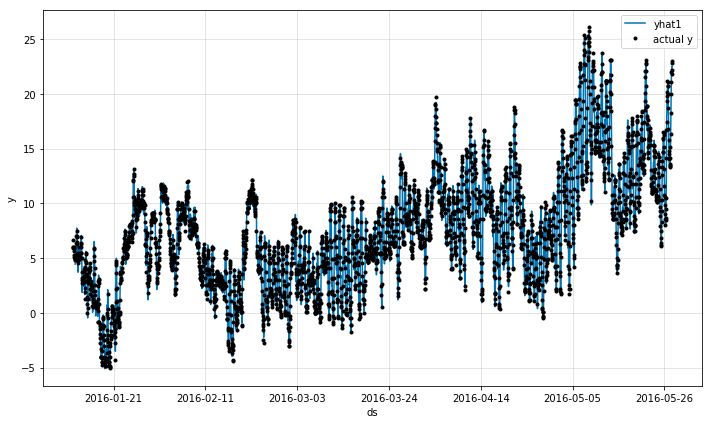

In [9]:
fig = m.plot(forecast)

In [10]:
from_date = '2016-03-11 19:00:00'
to_date = '2016-03-22 19:00:00'
forecast_slice = forecast.loc[(forecast['ds']>=from_date) & (forecast['ds']<=to_date)]

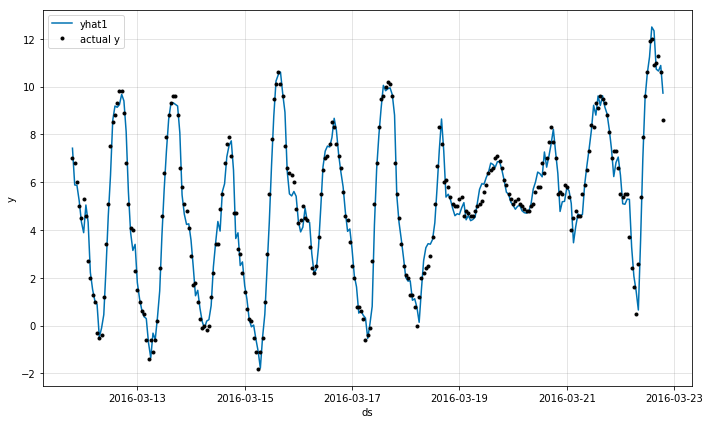

In [11]:
fig1 = m.plot(forecast_slice)